# Pharmaceutical Analysis
From this analysis, we can accurately determine the following:

1. Capomulin decreased the average tumor volume in the mice over the treatment period.
2. Capomulin increased the survival rate of the mice throughout the treatment period.
3. Capomulin decreased the amount of metastatic spread in the mice.

The data shows that Capomulin is a viable treatment for the tumors in the mice subjects, given the parameters of the study.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
trial_data = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID")

# Display the data table for preview
trial_data

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
trial_data_grouped = trial_data.groupby(["Drug", "Timepoint"])
mean_tumor_volume = trial_data_grouped['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame
mean_tumor_volume_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_tumor = trial_data_grouped['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
std_error_tumor_df = pd.DataFrame(std_error_tumor)

# Preview DataFrame
std_error_tumor_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_pivot = mean_tumor_volume_df.pivot_table(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
std_error_tumor_pivot = std_error_tumor_df.pivot_table(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')

mean_tumor_volume_pivot = mean_tumor_volume_pivot[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
std_error_tumor_pivot = std_error_tumor_pivot[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

# Preview that Reformatting worked
print(std_error_tumor_pivot.head())
mean_tumor_volume_pivot.head()

Drug       Capomulin  Infubinol  Ketapril   Placebo
Timepoint                                          
0           0.000000   0.000000  0.000000  0.000000
5           0.448593   0.235102  0.264819  0.218091
10          0.702684   0.282346  0.357421  0.402064
15          0.838617   0.357705  0.580268  0.614461
20          0.909731   0.476210  0.726484  0.839609


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


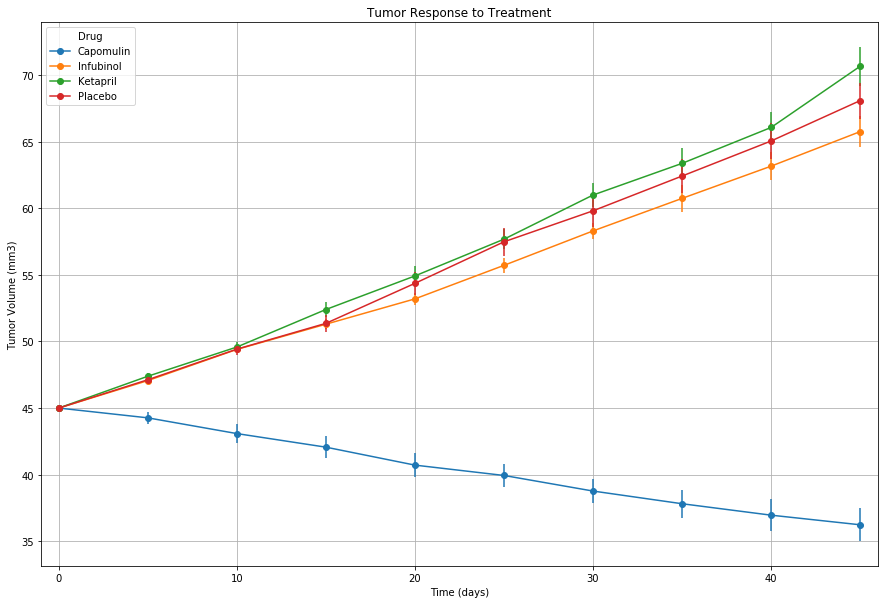

In [5]:
# Generate the Plot (with Error Bars)
mean_tumor_volume_pivot.plot(kind='line', figsize=(15, 10), grid=True, yerr=std_error_tumor_pivot, marker='o')
plt.xlim(-1, 46)
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.savefig('Images/Tumor Reponse to Treatment')

In [6]:
# Show the Figure
plt.show()

IndexError: Column(s) ['Timepoint', 'Tumor Volume (mm3)'] already selected

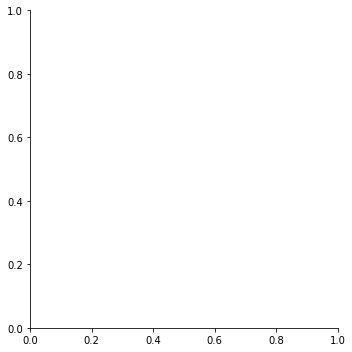

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_site = trial_data_grouped['Metastatic Sites']
mean_meta_site = meta_site.mean()

# Convert to DataFrame
mean_meta_site_df = pd.DataFrame(mean_meta_site)

# Preview DataFrame
mean_meta_site_df.head()

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_meta_site = meta_site.sem()

# Convert to DataFrame
std_meta_site_df = pd.DataFrame(std_meta_site)
# Preview DataFrame
std_meta_site_df.head()

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
mean_meta_site_pivot = mean_meta_site_df.pivot_table(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
std_meta_site_pivot = std_meta_site_df.pivot_table(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')

mean_meta_site_pivot = mean_meta_site_pivot[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
std_meta_site_pivot = std_meta_site_pivot[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

# Preview that Reformatting worked
print(mean_meta_site_pivot.head())
std_meta_site_pivot.head()

In [ ]:
# Generate the Plot (with Error Bars)
mean_meta_site_pivot.plot(kind='line', figsize=(15, 10), grid=True, yerr=std_meta_site_pivot, marker='o')
plt.xlim(-1, 46)
plt.xlabel('Treatment Duration (days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')

# Save the Figure
plt.savefig('Images/Metastatic Spread During Treatment')

# Show the Figure
plt.show()

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = trial_data_grouped['Mouse ID']
mice_count = mice.count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)

# Preview DataFrame
mice_count_df.head()

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pivot = mice_count_df.pivot_table(index = 'Timepoint', columns = 'Drug', values = 'Mouse ID')
mice_count_pivot = mice_count_pivot.rename(columns ={'Mouse ID': 'Mouse Count'})

mice_count_pivot = mice_count_pivot[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

# Preview the Data Frame
mice_count_pivot.head()

In [ ]:
# Generate the Plot (Accounting for percentages)
mice_count_perc = (mice_count_pivot / mice_count_pivot.iloc[0]) * 100

print(mice_count_perc)
mice_count_perc.plot(kind='line', figsize=(15, 10), grid=True, marker='o')
plt.xlim(-1, 46)
plt.xlabel('Time (days)')
plt.ylabel('Percentage of Mice Alive')
plt.title('Survival Rate of Mice By Drug')


# Show the Figure
plt.savefig('Images/Survival Rate of Mice By Drug')

plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug
tumor_perc_change = ((mean_tumor_volume_pivot.iloc[9] / mean_tumor_volume_pivot.iloc[0]) - 1) * 100

tumor_perc_change
# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs
tumor_perc_change_sorted = tumor_perc_change.sort_values()
tumor_perc_list = list(tumor_perc_change_sorted)


tumor_perc_change_sorted = pd.DataFrame(tumor_perc_change_sorted)
tumor_perc_change_sorted = tumor_perc_change_sorted.rename(columns= {0: 'Percent Change'})
tumor_perc_change_sorted = tumor_perc_change_sorted.round({'Percent Change': 2})

tumor_perc_change_sorted = tumor_perc_change_sorted.loc[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

tumor_positive = tumor_perc_change_sorted.loc[(tumor_perc_change_sorted['Percent Change'] < 0)]
tumor_negative = tumor_perc_change_sorted.loc[(tumor_perc_change_sorted['Percent Change'] >= 0)]
tick_values = [value for value in tumor_perc_change_sorted.index.values]

fig = plt.figure(figsize=(15,10))
plt.bar(tumor_positive.index.values, tumor_positive['Percent Change'], color='g', align='center')
plt.bar(tumor_negative.index.values, tumor_negative['Percent Change'], color='r', align='center')
plt.grid()
# Orient widths. Add labels, tick marks, etc. 
plt.xlabel('Drug')
plt.ylabel('Percent Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')

plt.xlim(-0.75, len(tick_values)-0.25)

# Use functions to label the percentages of changes
for i, x in zip(tumor_positive.index.values, tumor_positive['Percent Change']):
    plt.text(i, x-2, str(x)+'%', size=14, ha='center')

for i, x in zip(tumor_negative.index.values, tumor_negative['Percent Change']):
    plt.text(i, x+1, str(x)+'%', size=14, ha='center')

# Call functions to implement the function calls


# Save the Figure
plt.savefig('Images/Tumor Change Over 45 Day Treatment')

# Show the Figure
plt.show()